## seaborn

In [10]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import anndata as ad
import seaborn as sns
input_dir = "/Users/apple/Desktop/KB/data"

# Load dataset
data = np.load(input_dir+'/feat_RECOMB/full_data/biddy_full/Biddy_scvi_full_embeddings.npy')

adata_subset = ad.read_h5ad(input_dir+'/BiddyData/biddy_6534_2000_norm_log.h5ad')

# Extract clone_id labels
labels = adata_subset.obs["clone_id"].to_numpy()
num_cells = labels.shape[0]

print("data shape", data.shape)
print("labels shape", num_cells)

# Initialize UMAP and fit the data
# reducer = umap.UMAP()
# embedding = reducer.fit_transform(data)

data shape (6534, 10)
labels shape 6534


In [8]:
adata_subset.obs["reprogramming_day"].value_counts()

reprogramming_day
28    2451
21    1940
12     967
15     942
9      213
6       21
Name: count, dtype: int64

In [9]:
adata_subset.obs["reprogramming_day"].value_counts()/adata_subset.shape[0]

reprogramming_day
28    0.375115
21    0.296908
12    0.147995
15    0.144169
9     0.032599
6     0.003214
Name: count, dtype: float64

In [7]:
adata_subset.obs

,timecourse,reprogramming_day,reprogramming,cell_type,cell_cycle,cluster,monocle_state,pseudotime,CellTagD0_85k,CellTagD3_85k,CellTagD13_85k,CellTagD0_48k,CellTagD3_48k,CellTagD13_48k,clone_id,n_genes
HF1_AAAGCAATCCAGATCA_5,1,12,NaN,Ambiguous,G1,5,2,0.426868,424.0,476.0,NaN,424.0,476.0,NaN,424.0,4652
HF1_AACACGTAGAACAACT_5,1,12,NaN,Ambiguous,S,5,2,0.549377,195.0,NaN,NaN,195.0,NaN,NaN,195.0,4222
HF1_AAACCTGAGAGCAATT_5,1,12,NaN,Fibroblast,G2M,2,2,0.664971,647.0,309.0,NaN,647.0,309.0,NaN,647.0,3862
HF1_AACACGTTCGAGGTAG_5,1,12,False,iEP,G1,2,2,0.730338,487.0,240.0,NaN,487.0,240.0,NaN,487.0,3198
HF1_AACCATGGTCTAGAGG_5,1,12,NaN,iEP,G1,2,2,0.568279,652.0,203.0,NaN,652.0,203.0,NaN,652.0,3224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HF2_TTCTTAGAGCGACGTA_4,2,9,NaN,iEP,G2M,5,2,0.509046,2657.0,NaN,NaN,2657.0,NaN,NaN,2657.0,2038
HF2_TTCCCAGGTGATGATA_4,2,9,NaN,iEP,G2M,5,2,0.530828,2367.0,2514.0,NaN,2367.0,2514.0,NaN,2367.0,3610
HF2_TTCTCCTCATGAACCT_4,2,9,NaN,iEP,G2M,5,2,0.403314,2490.0,2042.0,NaN,2490.0,2042.0,NaN,2490.0,3993
HF2_TTGGAACCAAGAAAGG_4,2,9,NaN,Ambiguous,G1,2,2,1.029464,2764.0,2525.0,NaN,2764.0,2525.0,NaN,2764.0,3521


## Top 5 lineage highlighted

In [2]:
# Save the embeddings to a .npy file
# np.save("scVI_Biddy_full_UMAPembedding.npy", embedding)
# Load the embeddings from the .npy file
embedding = np.load("scVI_Biddy_full_UMAP_embedding.npy")


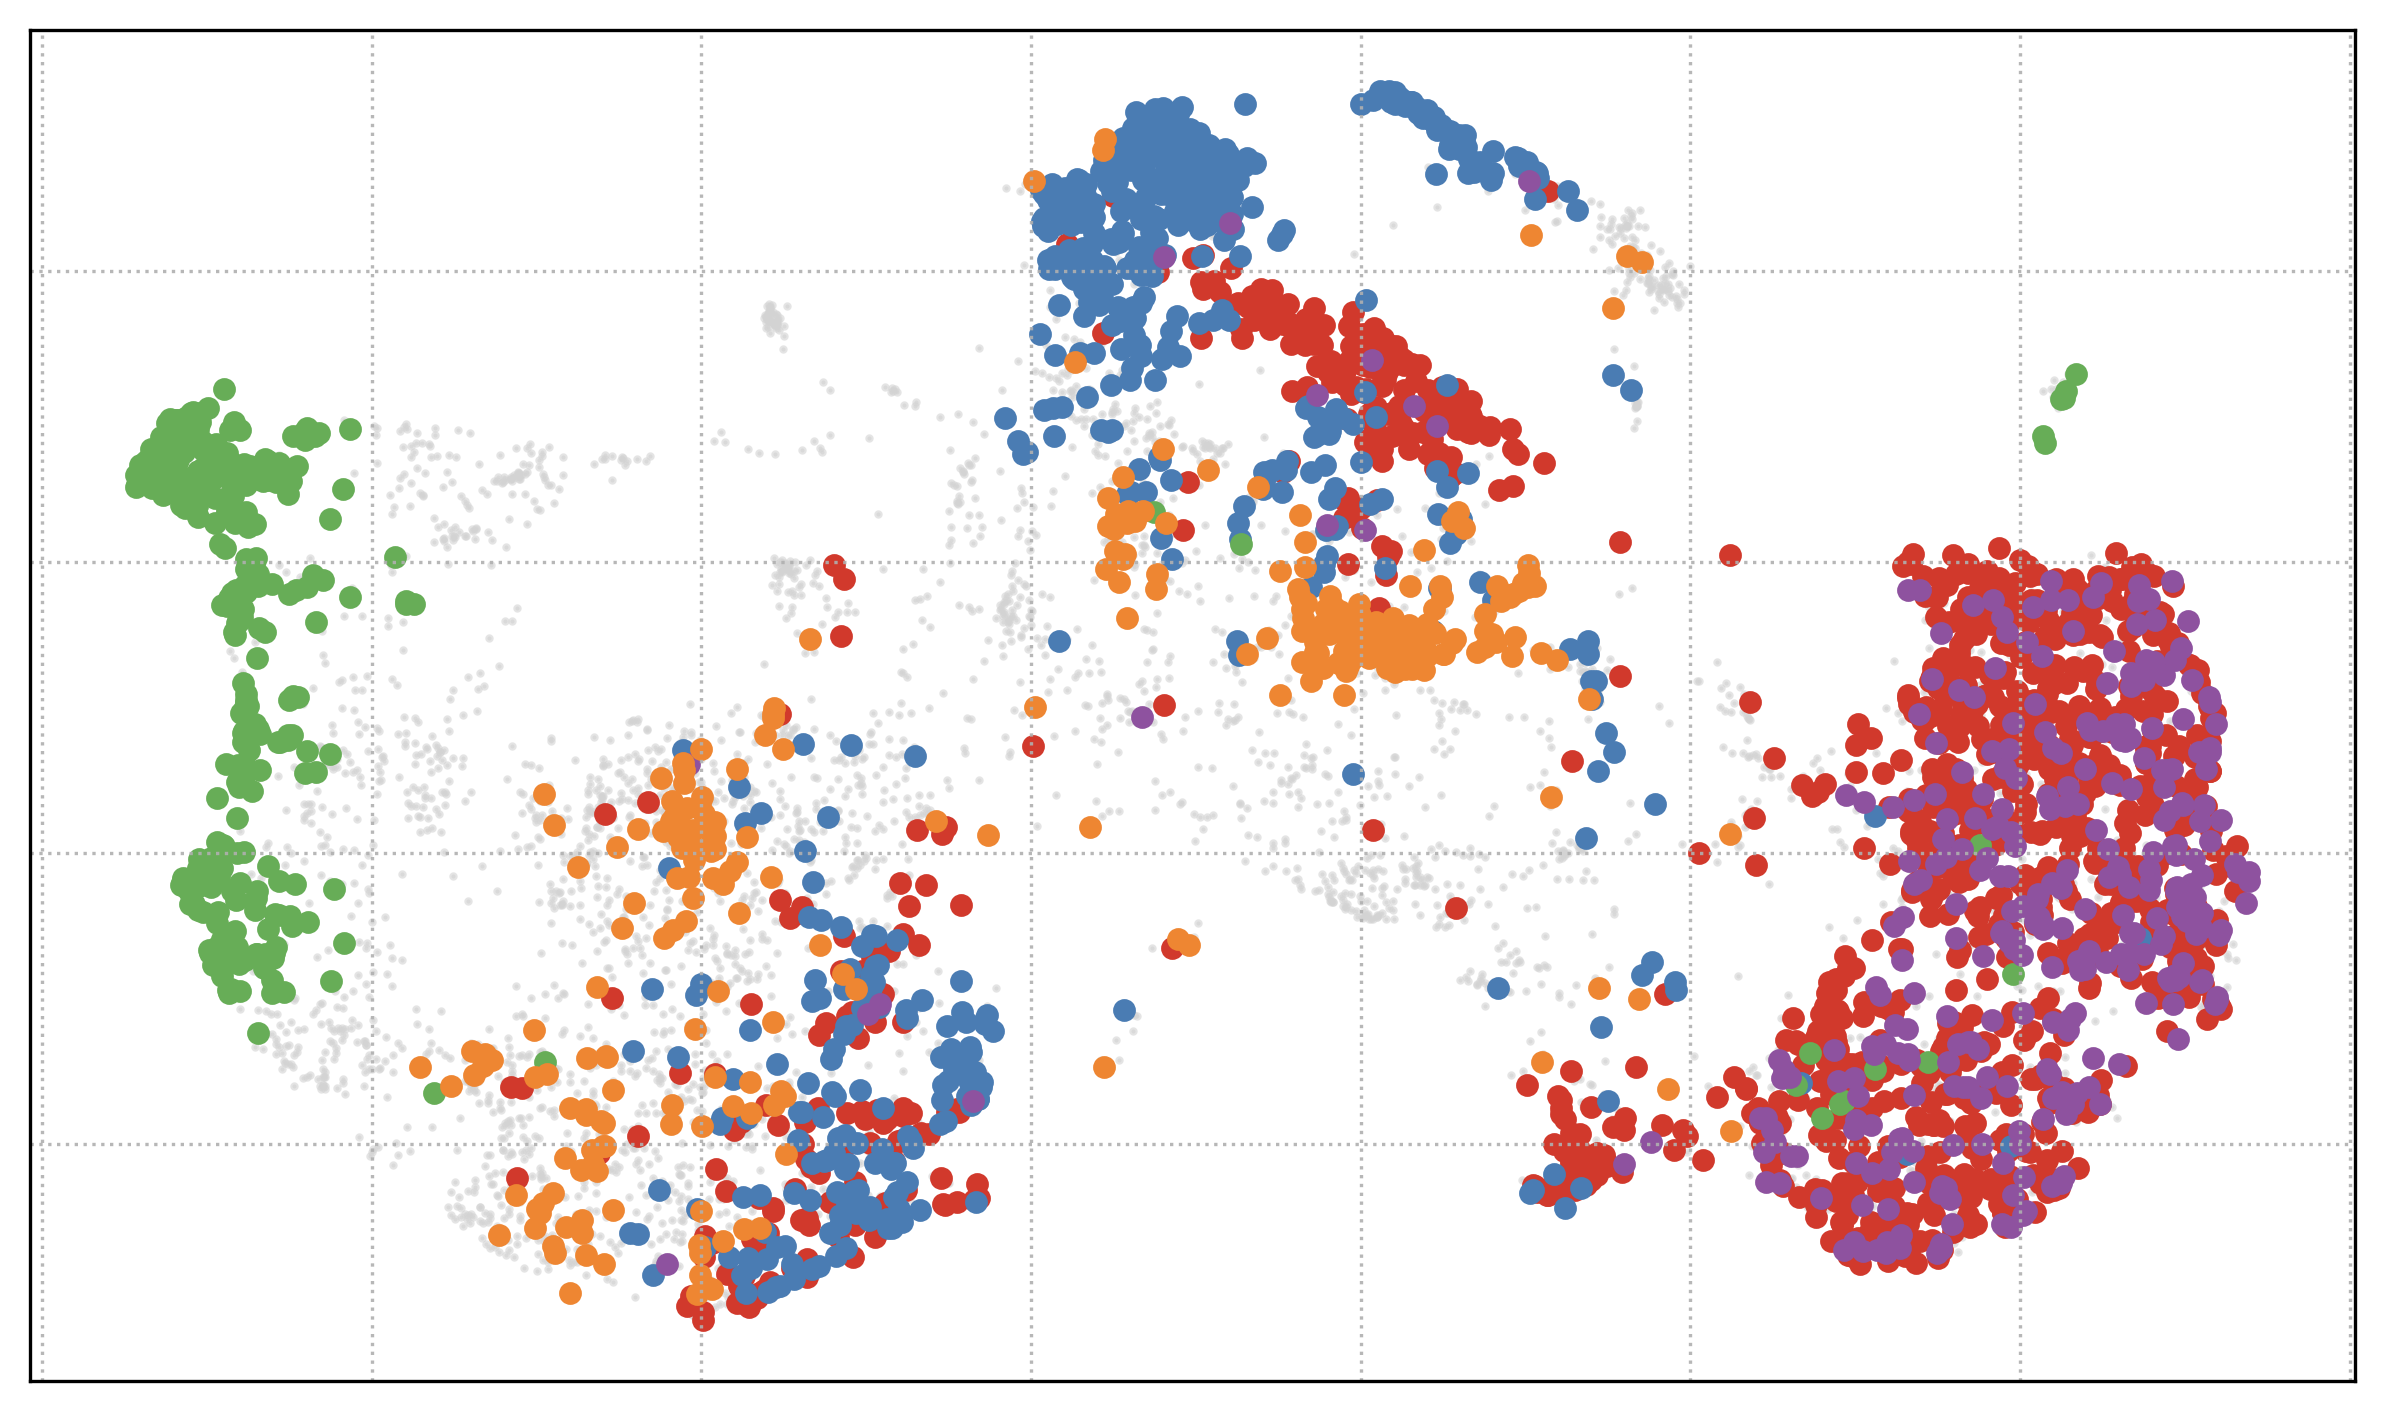

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the value counts of the clone_id
clone_id_counts = adata_subset.obs['clone_id'].value_counts()

# Identify the top 5 most frequent clone_ids
top_5_clone_ids = clone_id_counts.index[:5]

# Create a color map: all points are light gray by default
color_map = {clone_id: 'lightgray' for clone_id in labels}

# Convert the given RGB codes into hex format
custom_palette = ['#D1392C', '#4A7CB3', '#67AD57', '#8E529F', '#EE8632']  # Replacing with your provided RGB values

# Assign colors to the top 5 clone_ids using the provided color codes
for i, clone_id in enumerate(top_5_clone_ids):
    color_map[clone_id] = custom_palette[i]

# Generate the colors list based on the color_map
colors = [color_map[clone_id] for clone_id in labels]

# Separate indices for gray and colored cells
gray_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] == 'lightgray']
color_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] != 'lightgray']

# Create a scatter plot of the UMAP embedding
plt.figure(figsize=(10, 5.85), dpi=300)
# Add grid to the plot
plt.grid(True, alpha=0.9, linestyle=':')
# Remove axis ticks and labels, but keep the grid
plt.gca().tick_params(axis='both', which='both', length=0)  # Hides the tick marks but keeps the grid lines
plt.gca().set_xticklabels([])  # Hides the x-axis labels
plt.gca().set_yticklabels([])  # Hides the y-axis labels
# Plot gray cells first
plt.scatter(embedding[gray_indices, 0], embedding[gray_indices, 1], c='lightgray', s=1, label='_nolegend_', alpha=0.6)

# Overlay colored cells
for clone_id in top_5_clone_ids:
    color_mask = np.array([clone_id == cid for cid in labels])
    plt.scatter(embedding[color_mask, 0], embedding[color_mask, 1], 
                c=[color_map[clone_id]], s=20, label=clone_id)



# Create a custom legend for the top 5 clone IDs
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette[i], markersize=10, label=f'{clone_id}')
                  for i, clone_id in enumerate(top_5_clone_ids)]
# plt.legend(handles=legend_handles, title="Top 5 Clone IDs")
plt.grid(True, alpha=0.9, linestyle=':')
plt.show()


In [3]:
from sklearn.metrics import calinski_harabasz_score
# Calculate the Calinski-Harabasz score
score = calinski_harabasz_score(data, labels)

# Print the score
print("Calinski-Harabasz Score:", score)


Calinski-Harabasz Score: 21.55493820786291


In [17]:
# labels = adata_subset.obs["clone_id"].to_numpy()
adata_subset.obs["cell_type"]

HF1_AAAGCAATCCAGATCA_5     Ambiguous
HF1_AACACGTAGAACAACT_5     Ambiguous
HF1_AAACCTGAGAGCAATT_5    Fibroblast
HF1_AACACGTTCGAGGTAG_5           iEP
HF1_AACCATGGTCTAGAGG_5           iEP
                             ...    
HF2_TTCTTAGAGCGACGTA_4           iEP
HF2_TTCCCAGGTGATGATA_4           iEP
HF2_TTCTCCTCATGAACCT_4           iEP
HF2_TTGGAACCAAGAAAGG_4     Ambiguous
HF2_TTGTAGGGTCAGAGGT_4    Fibroblast
Name: cell_type, Length: 6534, dtype: category
Categories (3, object): ['Ambiguous', 'Fibroblast', 'iEP']

## One Lineage highlighted

In [9]:
from matplotlib.colors import LinearSegmentedColormap

# Extract reprogramming day counts
reprogramming_day_counts = adata_subset.obs['reprogramming_day'].value_counts()

# # Get the unique reprogramming days sorted from earliest to latest
# reprogramming_day_unique = np.sort(np.unique(adata.obs['reprogramming_day'].astype(int))).astype(str)
# print(reprogramming_day_unique)

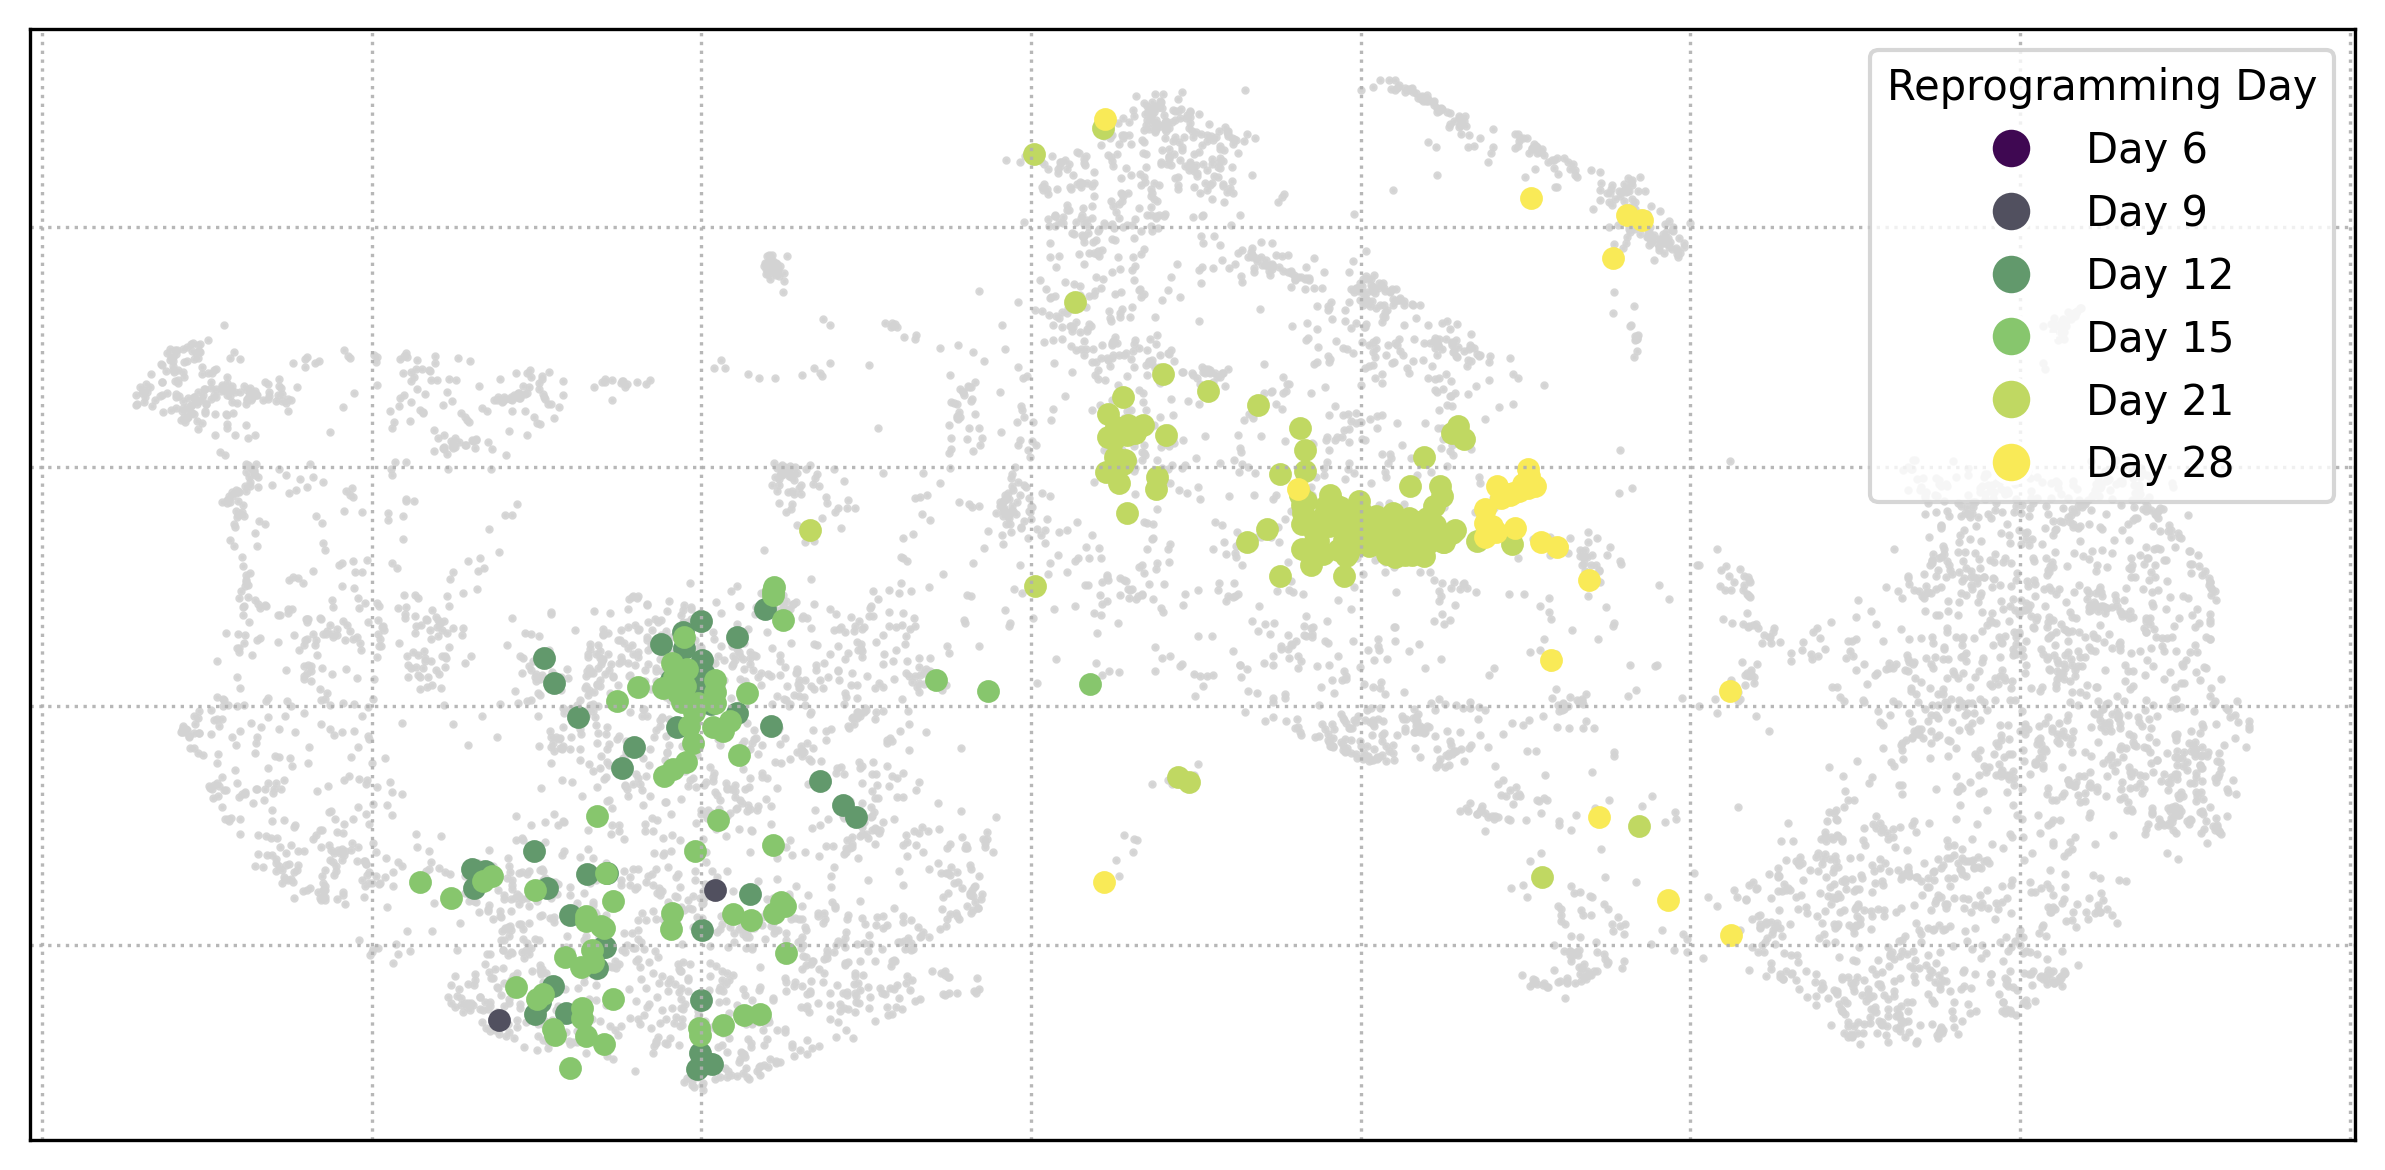

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Get the value counts of the clone_id
clone_id_counts = adata_subset.obs['clone_id'].value_counts()

# Identify the largest clone_id
largest_clone_id = clone_id_counts.index[4]

# Extract the reprogramming day values
reprogramming_day = adata_subset.obs['reprogramming_day'].to_numpy()

# Get the unique reprogramming days sorted from earliest to latest
# reprogramming_day_unique = np.sort(np.unique(reprogramming_day))
reprogramming_day_unique = np.sort(np.unique(adata_subset.obs['reprogramming_day'].astype(int))).astype(str)

# Define the RGB colors for the first, middle, and last timepoints
first_color = (63/255, 8/255, 82/255)      # Convert to 0-1 scale
middle_color = (107/255, 189/255, 115/255)  # Convert to 0-1 scale
last_color = (249/255, 234/255, 87/255)     # Convert to 0-1 scale

# Create a colormap that interpolates between the first, middle, and last colors
cmap = LinearSegmentedColormap.from_list("time_colormap", [first_color, middle_color, last_color], N=len(reprogramming_day_unique))

# Generate the colors for each reprogramming day using the colormap
reprogramming_palette = [cmap(i / (len(reprogramming_day_unique) - 1)) for i in range(len(reprogramming_day_unique))]

# Create a color map for reprogramming_day, initially all lightgray
color_map = {clone_id: 'lightgray' for clone_id in labels}

# For the largest clone_id, assign colors based on reprogramming_day values
for i, day in enumerate(reprogramming_day_unique):
    day_mask = (labels == largest_clone_id) & (reprogramming_day == day)
    for idx in np.where(day_mask)[0]:
        color_map[labels[idx]] = reprogramming_palette[i]

# Generate the colors list based on the color_map
colors = [color_map[clone_id] for clone_id in labels]

# Separate indices for gray and colored cells
gray_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] == 'lightgray']
color_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] != 'lightgray']

# Create a scatter plot of the UMAP embedding
plt.figure(figsize=(10, 4.809), dpi=300)

# Plot gray cells first
plt.scatter(embedding[gray_indices, 0], embedding[gray_indices, 1], c='lightgray', s=1, label='_nolegend_', alpha=0.9)

# Overlay colored cells based on reprogramming_day values
for i, day in enumerate(reprogramming_day_unique):
    day_mask = (labels == largest_clone_id) & (reprogramming_day == day)
    plt.scatter(embedding[day_mask, 0], embedding[day_mask, 1], 
                c=[reprogramming_palette[i]], s=20, label=f'Reprogramming Day {day}')

# Add a grid to the plot
plt.grid(True, alpha=0.9, linestyle=':')
plt.gca().tick_params(axis='both', which='both', length=0)  # Hides the tick marks but keeps the grid lines
plt.gca().set_xticklabels([])  # Hides the x-axis labels
plt.gca().set_yticklabels([])  # Hides the y-axis labels
# Create a custom legend for the reprogramming_day
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=reprogramming_palette[i], markersize=10, label=f'Day {day}')
                  for i, day in enumerate(reprogramming_day_unique)]
plt.legend(handles=legend_handles, title="Reprogramming Day")

plt.show()


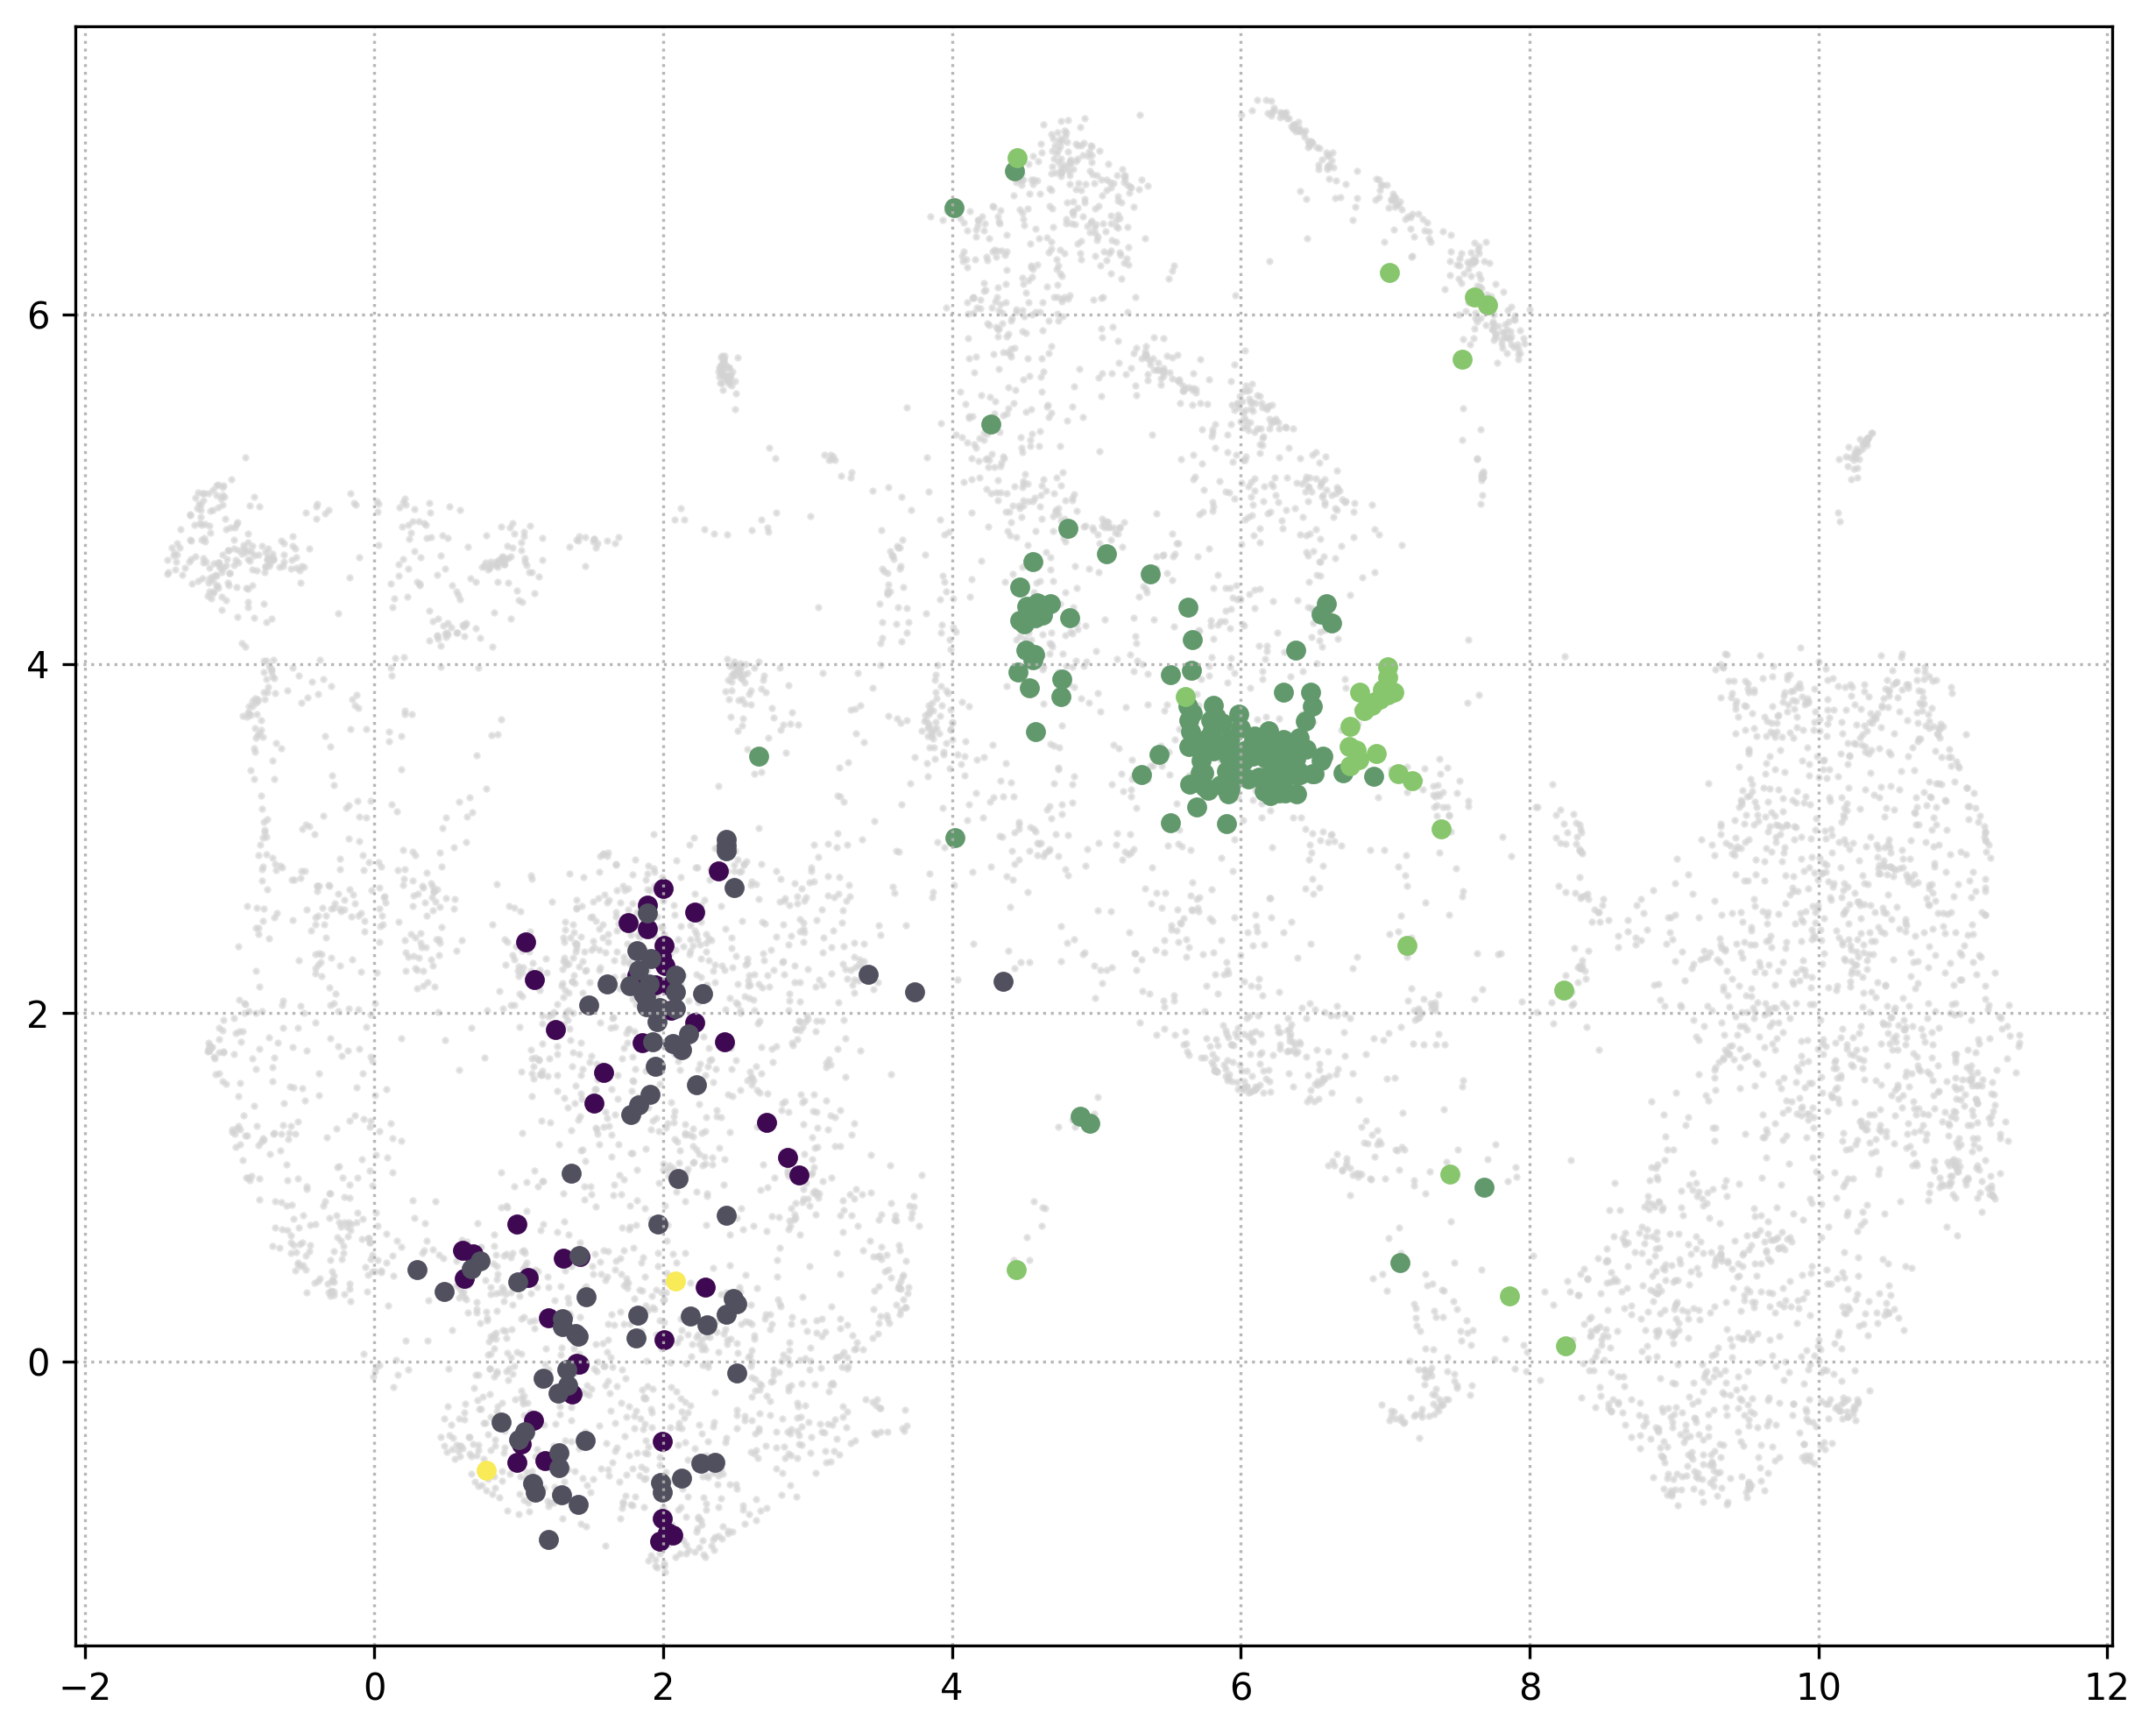

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Get the value counts of the clone_id
clone_id_counts = adata_subset.obs['clone_id'].value_counts()

# Identify the largest clone_id
largest_clone_id = clone_id_counts.index[4]

# Extract the reprogramming day values
reprogramming_day = adata_subset.obs['reprogramming_day'].to_numpy()

# Get the unique reprogramming days sorted from earliest to latest
reprogramming_day_unique = np.sort(np.unique(reprogramming_day))

# Define the RGB colors for the first, middle, and last timepoints
first_color = (63/255, 8/255, 82/255)      # Convert to 0-1 scale
middle_color = (107/255, 189/255, 115/255)  # Convert to 0-1 scale
last_color = (249/255, 234/255, 87/255)     # Convert to 0-1 scale

# Create a colormap that interpolates between the first, middle, and last colors
cmap = LinearSegmentedColormap.from_list("time_colormap", [first_color, middle_color, last_color], N=len(reprogramming_day_unique))

# Generate the colors for each reprogramming day using the colormap
reprogramming_palette = [cmap(i / (len(reprogramming_day_unique) - 1)) for i in range(len(reprogramming_day_unique))]

# Create a color map for reprogramming_day, initially all lightgray
color_map = {clone_id: 'lightgray' for clone_id in labels}

# For the largest clone_id, assign colors based on reprogramming_day values
for i, day in enumerate(reprogramming_day_unique):
    day_mask = (labels == largest_clone_id) & (reprogramming_day == day)
    for idx in np.where(day_mask)[0]:
        color_map[labels[idx]] = reprogramming_palette[i]

# Generate the colors list based on the color_map
colors = [color_map[clone_id] for clone_id in labels]

# Separate indices for gray and colored cells
gray_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] == 'lightgray']
color_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] != 'lightgray']

# Create a scatter plot of the UMAP embedding
plt.figure(figsize=(10, 8), dpi=300)

# Plot gray cells first
plt.scatter(embedding[gray_indices, 0], embedding[gray_indices, 1], c='lightgray', s=1, label='_nolegend_', alpha=0.6)

# Overlay colored cells based on reprogramming_day values
for i, day in enumerate(reprogramming_day_unique):
    day_mask = (labels == largest_clone_id) & (reprogramming_day == day)
    plt.scatter(embedding[day_mask, 0], embedding[day_mask, 1], 
                c=[reprogramming_palette[i]], s=20, label=f'Reprogramming Day {day}')

# Add a grid to the plot
plt.grid(True, alpha=0.9, linestyle=':')

# Create a custom legend for the reprogramming_day
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=reprogramming_palette[i], markersize=10, label=f'Day {day}')
                  for i, day in enumerate(reprogramming_day_unique)]
# plt.legend(handles=legend_handles, title="Reprogramming Day")

plt.show()


## Cell Types

In [4]:
10*2.432/5.665

4.293027360988526

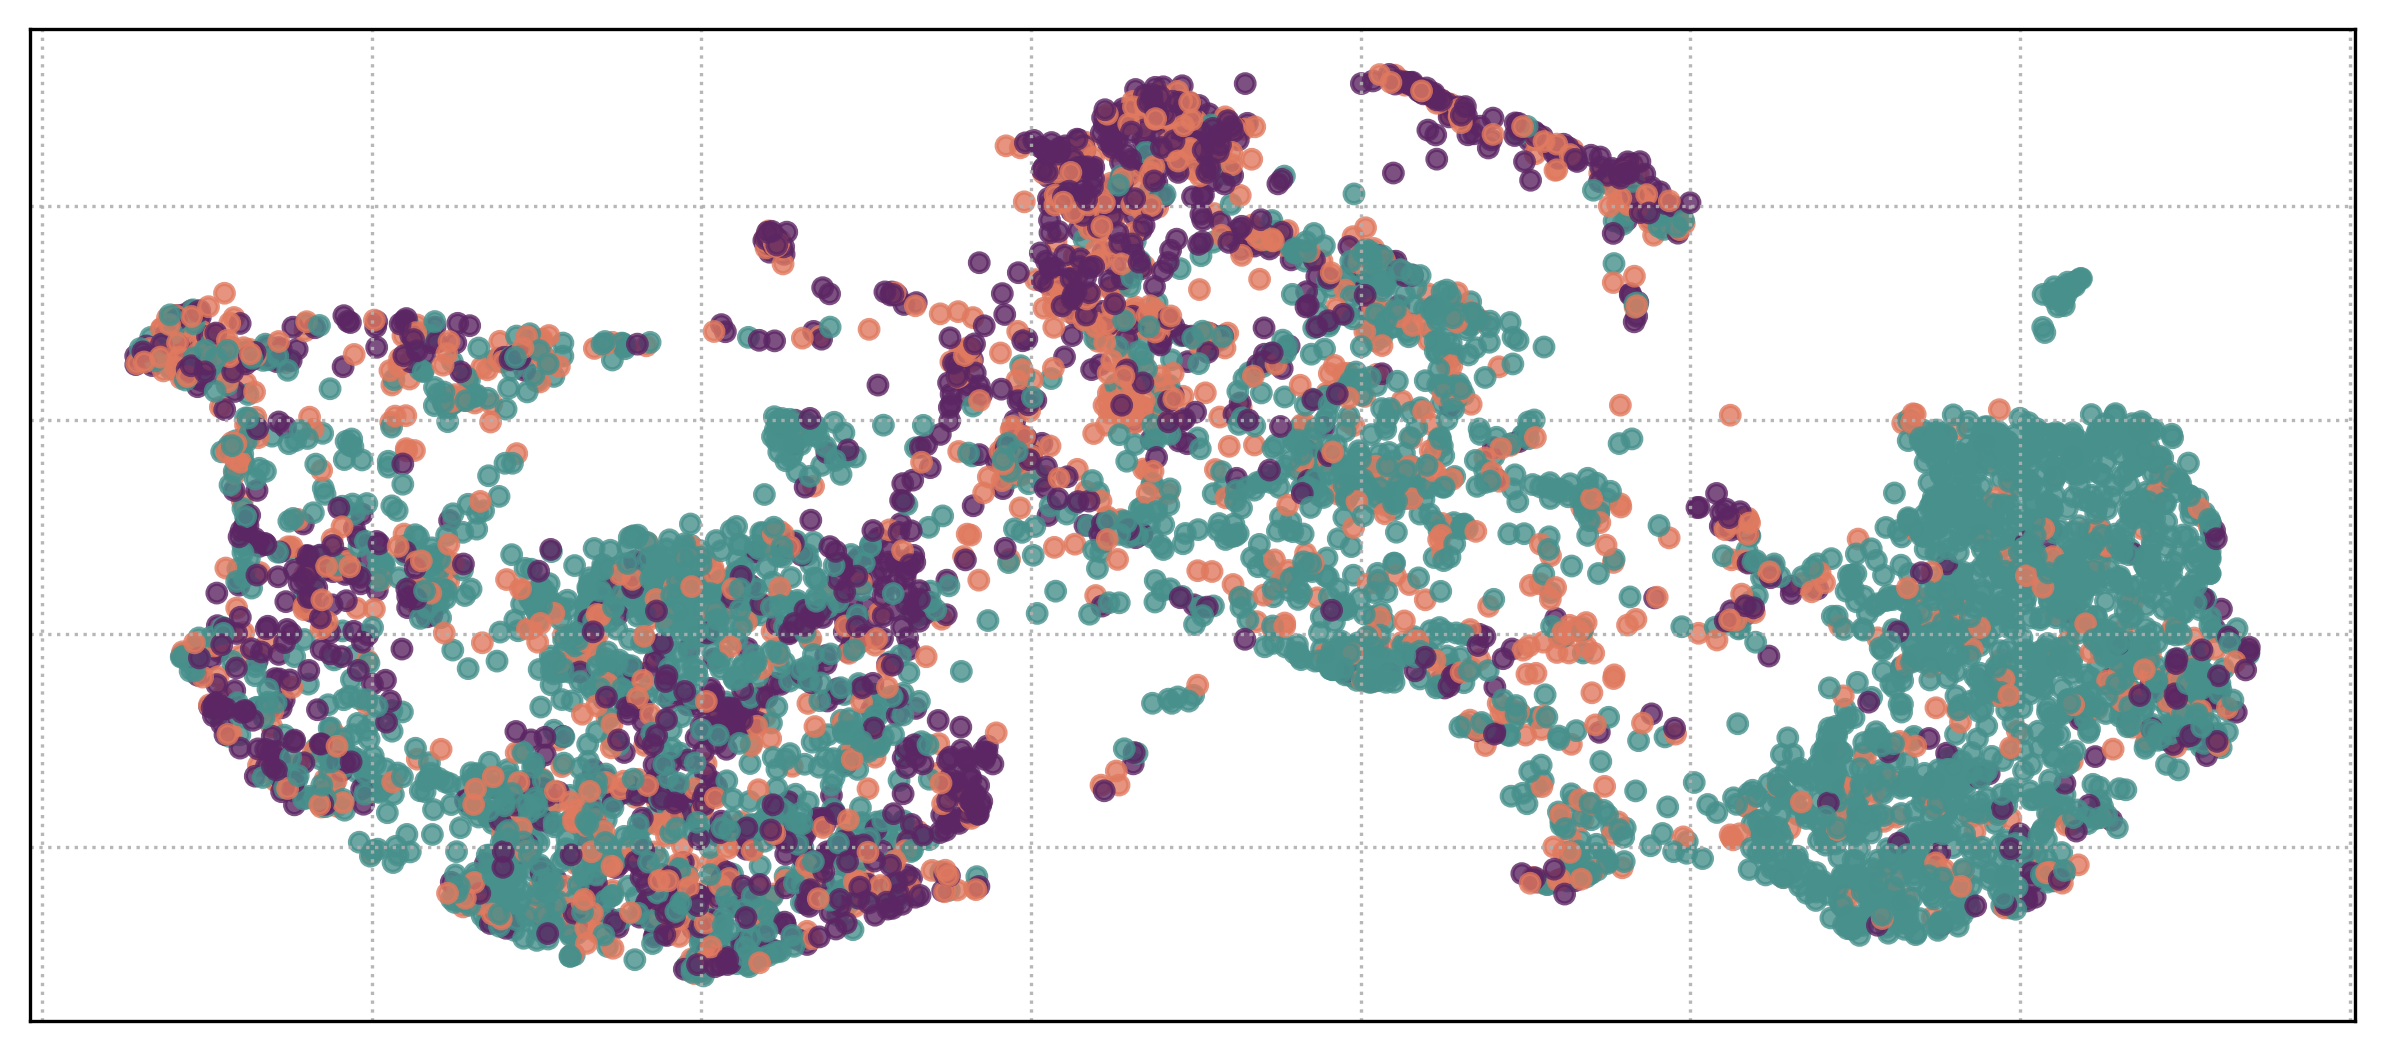

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the cell type labels
cell_types = adata_subset.obs['cell_type'].to_numpy()

# Define the RGB colors for the cell types (converted to hex codes)
cell_type_colors = {
    'Fibroblast': '#5B2663',   # RGB (91, 38, 99)
    'iEP': '#47908C',          # RGB (71, 144, 140)
    'Ambiguous': '#E07A5F'     # RGB (224, 122, 95)
}

# Create a list of colors for each cell based on its cell type
colors = [cell_type_colors[ctype] for ctype in cell_types]

# Create a scatter plot of the UMAP embedding
plt.figure(figsize=(10, 4.293), dpi=300)

# Plot cells, each colored by their cell type
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, s=20, alpha=0.8)

# Add a grid to the plot
plt.grid(True, alpha=0.9, linestyle=':')

# Remove axis ticks and labels, but keep the grid
plt.gca().tick_params(axis='both', which='both', length=0)  # Hides the tick marks but keeps the grid lines
plt.gca().set_xticklabels([])  # Hides the x-axis labels
plt.gca().set_yticklabels([])  # Hides the y-axis labels

# Create a custom legend for the cell types
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cell_type_colors[ctype], markersize=10, label=ctype)
                  for ctype in cell_type_colors.keys()]


# plt.legend(handles=legend_handles, title="Cell Type")

# Show the plot
plt.show()


## Lineage Histogram

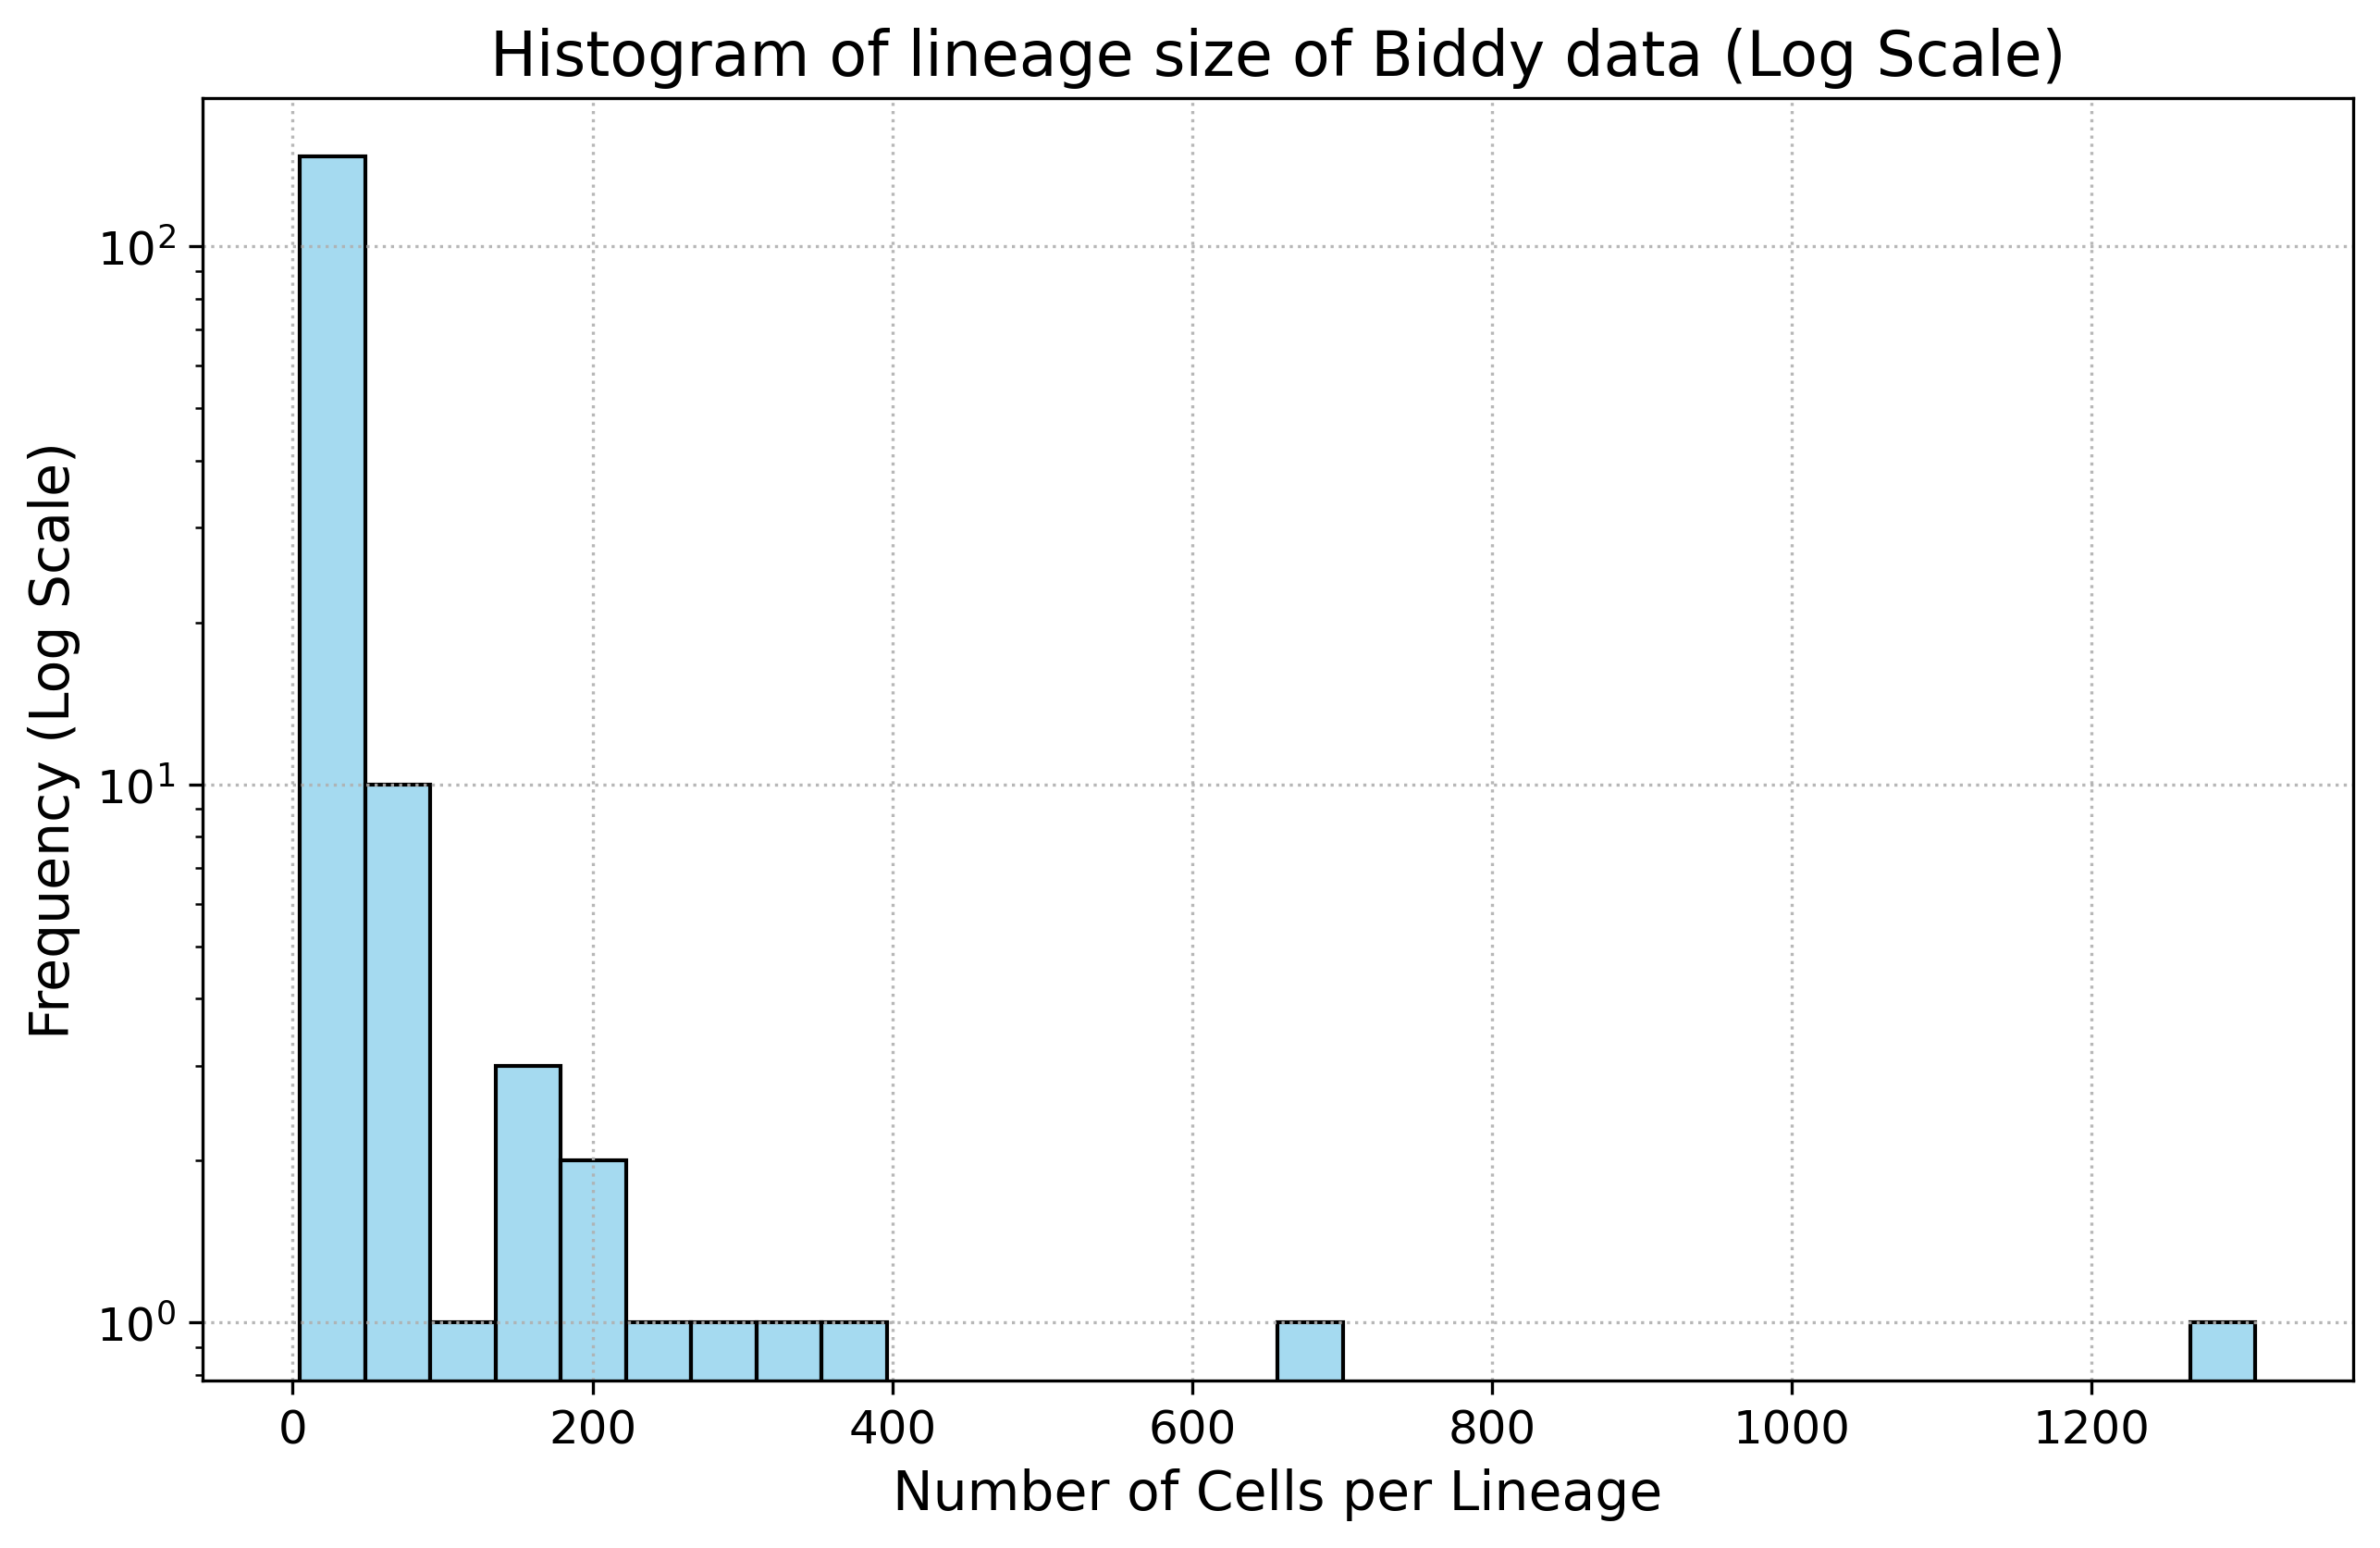

In [28]:
value_counts = adata_subset.obs['clone_id'].value_counts()
# Set up the figure with higher DPI
plt.figure(figsize=(10, 6), dpi=300)

# Plot the histogram using Seaborn with log scale
sns.histplot(value_counts, bins=30, kde=False, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title('Histogram of lineage size of Biddy data (Log Scale)', fontsize=16)
plt.xlabel('Number of Cells per Lineage', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.9, linestyle=':')

# Save the figure with high quality if needed
# plt.savefig("clone_id_value_counts_histogram_log_scale.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()